# Digit Recognizer

**Model to classify digits in MNIST data for Kaggle Digit Recognizer competition**

**Pranav Panganamamula**

**My first attempt at creating a solution to a ML and CV problem!**

**Submission received a test accuracy of 98%**

## Import Libraries

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from PIL import Image

## Process and Visualize Data

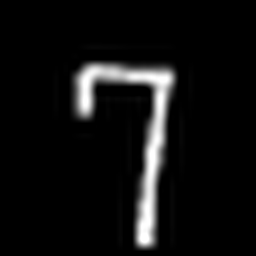

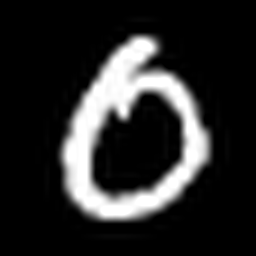

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
img_size = 28 # images are 28x28 
num_classes = 10 # digits 0-9 
num_color_channels = 1 # grayscale images

def prep_data(raw_data, test):
    num_images = raw_data.shape[0]
    X = raw_data.values
    if (not test):
        X = X[:, 1:]
    X = X.reshape(num_images, img_size, img_size, num_color_channels)
    X = X / 255
    if (not test):
        y = keras.utils.to_categorical(raw_data.label, num_classes)
        return X, y
    else:
        return X

# Load training and test data from csv files
train_path = "data/train.csv"
raw_train_data = pd.read_csv(train_path)

test_path = "data/test.csv"
raw_test_data = pd.read_csv(test_path) 

# Convert data to tensors and normalize images
train_data, train_labels = prep_data(raw_train_data, test=False)
test_data = prep_data(raw_test_data, test=True)

# Display arbitrary images from training data
im = Image.fromarray((train_data[50, :, :, 0] * 255).astype(np.uint8))
display(im.resize((256, 256), Image.LANCZOS))

im = Image.fromarray((train_data[200, :, :, 0] * 255).astype(np.uint8))
display(im.resize((256, 256), Image.LANCZOS))

raw_train_data.head()

## Create and Train Model

In [43]:
# Create model architecture
digit_model = Sequential()
digit_model.add(Conv2D(filters=10, kernel_size=(4,4), 
                       activation='relu', 
                       input_shape=(img_size, img_size, num_color_channels)))
digit_model.add(Conv2D(filters=10, kernel_size=(4,4), activation='relu'))
digit_model.add(Dropout(0.2))
digit_model.add(Flatten())
digit_model.add(Dense(100, activation='relu'))
digit_model.add(Dense(num_classes, activation='softmax'))

# Compile and train model
digit_model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
digit_model.fit(train_data, train_labels, batch_size=128, epochs=3, validation_split=0.2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 33600 samples, validate on 8400 samples
Epoch 1/3
33600/33600 [==============================] - 14s 422us/sample - loss: 0.2859 - acc: 0.9154 - val_loss: 0.1060 - val_acc: 0.9663
Epoch 2/3
33600/33600 [==============================] - 14s 419us/sample - loss: 0.0812 - acc: 0.9759 - val_loss: 0.0607 - val_acc: 0.9783
Epoch 3/3
33600/33600 [==============================] - 14s 422us/sample - loss: 0.0537 - acc: 0.9835 - val_loss: 0.0535 - val_acc: 0.9838


## Generate Predictions

In [56]:
# Retrieve most likely labels from predictions
def decode_predictions(preds):
    most_likely_labels = []
    (n, p) = preds.shape
    for pred in preds:
        label = np.argmax(pred)
        most_likely_labels.append(label)
    return most_likely_labels
    
predictions = digit_model.predict(test_data, batch_size=128)
most_likely_labels = decode_predictions(predictions)

28000


In [ ]:
# Generate submission csv file
image_ids = list(range(1, test_data.shape[0]+1))
data = {'ImageId':image_ids, 'Label':most_likely_labels}
classifications = pd.DataFrame(data)
classifications.to_csv(r'submission.csv', index=False, header=True)